DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a \$2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

Data Dictionary

- Ticket #: Ticket number assigned to each complaint
- Customer Complaint: Description of complaint
- Date: Date of complaint
- Time: Time of complaint
- Received Via: Mode of communication of the complaint
- City: Customer city
- State: Customer state
- Zipcode: Customer zip
- Status: Status of complaint
- Filing on behalf of someone

**Analysis Task**

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

    - Import data into Python environment. 
    - Provide the trend chart for the number of complaints at monthly and daily granularity levels. 
    - Provide a table with the frequency of complaint types. 

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

    - Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
    - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
        - Which state has the maximum complaints
        - Which state has the highest percentage of unresolved complaints
            - Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [2]:
style.use('fivethirtyeight')

In [3]:
#Import data into DataFrame.
comcast_df = pd.read_csv('Comcast_telecom_complaints_data.csv')
comcast_df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
# Dropping date column as the date format of the column is inconsistent
comcast_df.drop(columns='Date', inplace=True)

In [5]:
# Rename Date_month_year column as Date and convert data into dartetime format
comcast_df.rename(columns={"Date_month_year":"Date"}, inplace=True)
comcast_df[['Date']] = comcast_df['Date'].apply(pd.to_datetime)

In [6]:
comcast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Time                         2224 non-null   object        
 4   Received Via                 2224 non-null   object        
 5   City                         2224 non-null   object        
 6   State                        2224 non-null   object        
 7   Zip code                     2224 non-null   int64         
 8   Status                       2224 non-null   object        
 9   Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 173.9+ KB



### 1. Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [7]:
comcast_df

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,2015-02-04,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,2015-02-06,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,2015-09-06,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,2015-06-23,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [8]:
# Sorting dataset by Date
comcast_df.sort_values(by='Date',inplace=True, ignore_index=True)
comcast_df.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,211472,comcast cable,2015-01-04,10:43:20 AM,Customer Care Call,Lockport,Illinois,60441,Closed,No
1,213355,Comcast is ignoring me now. They are making NO...,2015-01-04,10:56:15 PM,Internet,Golden,Colorado,80401,Closed,No
2,213198,Fradulent Services,2015-01-04,8:56:38 PM,Customer Care Call,Waukegan,Illinois,60085,Closed,No
3,212818,Incorrect Billing,2015-01-04,5:39:39 PM,Customer Care Call,Boynton Beach,Florida,33426,Closed,No
4,211904,Unable to get in touch with anyone that has th...,2015-01-04,1:06:33 PM,Customer Care Call,Huntsville,Alabama,35801,Closed,No


In [9]:
# grouping data by date
daily_df = pd.DataFrame(comcast_df.groupby(by='Date',as_index=False)['Ticket #'].count())
daily_df

,Date,Ticket #
0,2015-01-04,18
1,2015-01-05,12
2,2015-01-06,25
3,2015-02-04,27
4,2015-02-05,7
...,...,...
86,2015-11-05,12
87,2015-11-06,21
88,2015-12-04,15
89,2015-12-05,7


<BarContainer object of 91 artists>

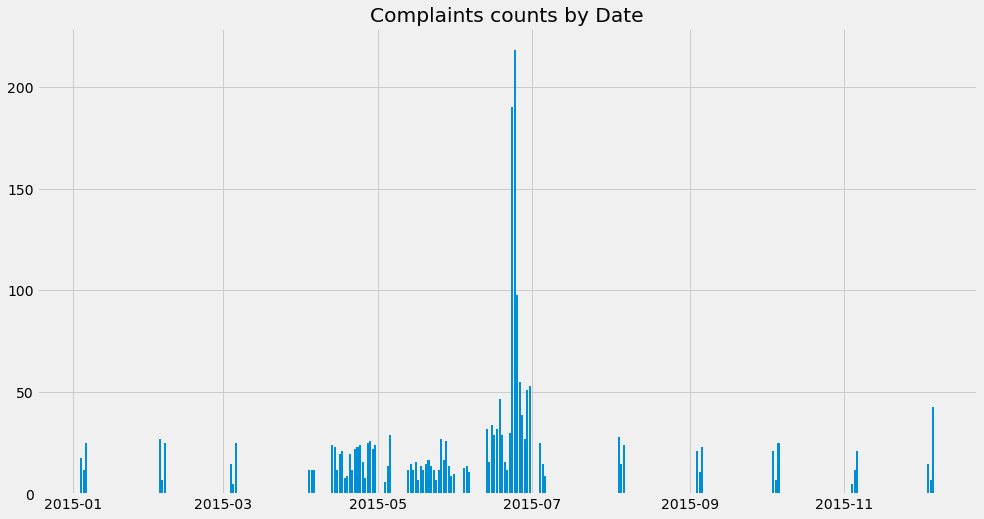

In [10]:
plt.figure(figsize=(15,8))
plt.title('Complaints counts by Date')
plt.bar(daily_df['Date'],daily_df['Ticket #'])

In [11]:
# Grouping data by month
monthly_df = daily_df.groupby(pd.Grouper(key='Date',freq='M')).sum()
monthly_df

,Ticket #
Date,
2015-01-31,55
2015-02-28,59
2015-03-31,45
2015-04-30,375
2015-05-31,317
2015-06-30,1046
2015-07-31,49
2015-08-31,67
2015-09-30,55


In [12]:
monthly_df = monthly_df.reset_index()

In [13]:
# Adding month colomn to display in chart clearly.
monthly_df['Month'] = monthly_df['Date'].dt.month_name()
monthly_df

,Date,Ticket #,Month
0,2015-01-31,55,January
1,2015-02-28,59,February
2,2015-03-31,45,March
3,2015-04-30,375,April
4,2015-05-31,317,May
5,2015-06-30,1046,June
6,2015-07-31,49,July
7,2015-08-31,67,August
8,2015-09-30,55,September
9,2015-10-31,53,October


<AxesSubplot:title={'center':'Complaint frequency by Month'}, xlabel='Month', ylabel='Ticket #'>

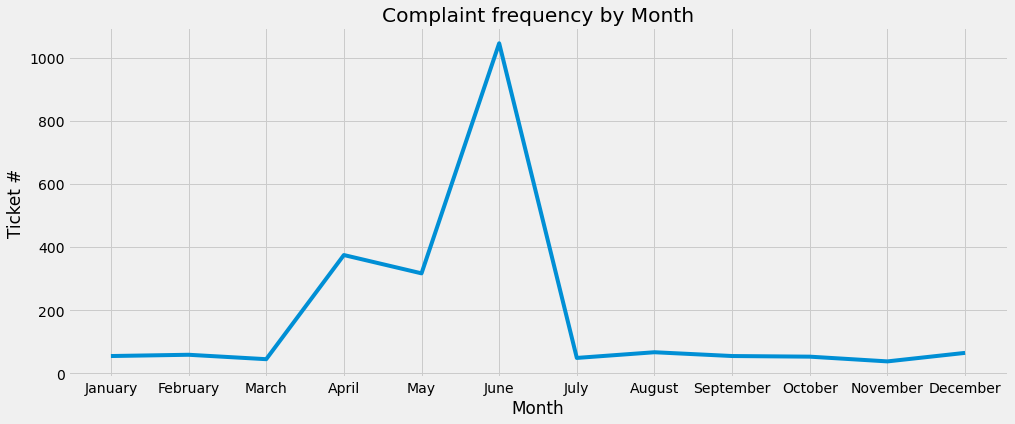

In [14]:
plt.figure(figsize=(15,6))
plt.title('Complaint frequency by Month')
sns.lineplot(data=monthly_df, x='Month', y='Ticket #' )

### Provide a table with the frequency of complaint types.

In [15]:
comcast_df['Customer Complaint']

0                                           comcast cable
1       Comcast is ignoring me now. They are making NO...
2                                      Fradulent Services
3                                       Incorrect Billing
4       Unable to get in touch with anyone that has th...
                              ...                        
2219                      Comcast not refunding my credit
2220                                    Comcast Data Caps
2221                                    Unresolved Issues
2222                    Billing & Customer Service Issues
2223                                     Comcast monopoly
Name: Customer Complaint, Length: 2224, dtype: object

In [16]:
# Extracting usefull data to categorize Customer complaints.
import re
comcast_df['revised comp'] = comcast_df['Customer Complaint'].apply(lambda x : x.upper())
comcast_df['revised comp'] = comcast_df['revised comp'].map(lambda x: re.sub(r'\W+', ' ', x))
comcast_df['revised comp']

0                                           COMCAST CABLE
1       COMCAST IS IGNORING ME NOW THEY ARE MAKING NO ...
2                                      FRADULENT SERVICES
3                                       INCORRECT BILLING
4       UNABLE TO GET IN TOUCH WITH ANYONE THAT HAS TH...
                              ...                        
2219                      COMCAST NOT REFUNDING MY CREDIT
2220                                    COMCAST DATA CAPS
2221                                    UNRESOLVED ISSUES
2222                      BILLING CUSTOMER SERVICE ISSUES
2223                                     COMCAST MONOPOLY
Name: revised comp, Length: 2224, dtype: object

In [17]:
Freq_table = comcast_df['revised comp'].value_counts()
Freq_table

COMCAST                                                 102
COMCAST DATA CAP                                         30
COMCAST INTERNET                                         30
COMCAST DATA CAPS                                        21
COMCAST BILLING                                          20
                                                       ... 
COMCAST XFINITY SLAMMING                                  1
XFINITY WIFI ACCESS                                       1
COMCAST INTERNET TELEPHONE TV SERVICE                     1
COMCAST TERRIBLE SERVICE 2                                1
BILLED FOR INTERNET SERVICE THAT WAS NEVER INSTALLED      1
Name: revised comp, Length: 1729, dtype: int64

### Which complaint types are maximum

In [18]:
# Grouping similar kind of complaint to categorize complaints in meaningful way.
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Getting stopword from nltk
stop_words = set(stopwords.words('english'))
stop_words = [x.upper() for x in stop_words]

In [19]:
# Collecting all words in the complaints
word_list = []
for i in range(len(comcast_df)):
    word_list.extend(comcast_df.loc[i, 'revised comp'].split(' '))
# Removing stop words from the list
word_list = [x.strip() for x in word_list if x not in stop_words]
Counter(word_list).most_common(50)

[('COMCAST', 1246),
 ('INTERNET', 535),
 ('SERVICE', 456),
 ('BILLING', 294),
 ('DATA', 219),
 ('SPEED', 122),
 ('', 110),
 ('CAP', 106),
 ('XFINITY', 103),
 ('CUSTOMER', 94),
 ('ISSUES', 93),
 ('CAPS', 78),
 ('PRACTICES', 74),
 ('SPEEDS', 72),
 ('COMPLAINT', 71),
 ('CHARGES', 71),
 ('BILL', 64),
 ('UNFAIR', 59),
 ('CABLE', 56),
 ('SERVICES', 55),
 ('THROTTLING', 54),
 ('SLOW', 49),
 ('USAGE', 47),
 ('POOR', 45),
 ('PRICING', 42),
 ('PRICE', 40),
 ('CONNECTION', 37),
 ('BUSINESS', 33),
 ('ISSUE', 30),
 ('CONTRACT', 30),
 ('PHONE', 30),
 ('FALSE', 27),
 ('CHARGED', 27),
 ('ACCOUNT', 26),
 ('HIGH', 25),
 ('WITHOUT', 25),
 ('CHARGING', 25),
 ('PROBLEMS', 24),
 ('FEES', 24),
 ('CHARGE', 23),
 ('DECEPTIVE', 23),
 ('HBO', 22),
 ('TV', 22),
 ('FEE', 22),
 ('PAYING', 21),
 ('FRAUDULENT', 21),
 ('MONOPOLY', 21),
 ('PRICES', 21),
 ('SWITCH', 21),
 ('MODEM', 20)]

In [20]:
# this function will identify categories of text using given dictionery
def identify_category(categories,complaint):
    for key in categories:
        for word in categories[key] :
            if word in complaint:
                return key
    return "OTHER"

In [21]:
# gruping similar complaints 
categories = {'BILLING' :['BILLING','BILL','CHARGE'],
              'INTERNET' : ['INTERNET','DATA','DATA CAP','DATA CAPS','SPEED','SPEEDS',"SLOW",'MODEM'],
              'CONNECTION' : ['NETWORK','CONNECTION','CABLE','PHONE'],
              'PRICING':['PRICE', 'PRICING','CHARGES','UNFAIR','FEES','PRICES'],
              'TV':['TV','HBO'],
              'SERVICE':['SERVICE','SERVICES','CONTRACT']}
# Test identify_category function
identify_category(categories,'CABLE')

'CONNECTION'

In [22]:
comcast_df['Catogory'] = comcast_df['revised comp'].apply(lambda x : identify_category(categories,x))

In [23]:
# Grouping data by identified categories
grouped_by_comp = comcast_df.groupby(by='Catogory',as_index=False)['Customer Complaint'].count()
grouped_by_comp.sort_values('Customer Complaint', inplace=True, ascending=False, ignore_index=True)
grouped_by_comp

,Catogory,Customer Complaint
0,INTERNET,746
1,OTHER,563
2,BILLING,503
3,SERVICE,258
4,PRICING,78
5,CONNECTION,44
6,TV,32


<AxesSubplot:title={'center':'Complaints by Category'}, xlabel='Catogory', ylabel='Customer Complaint'>

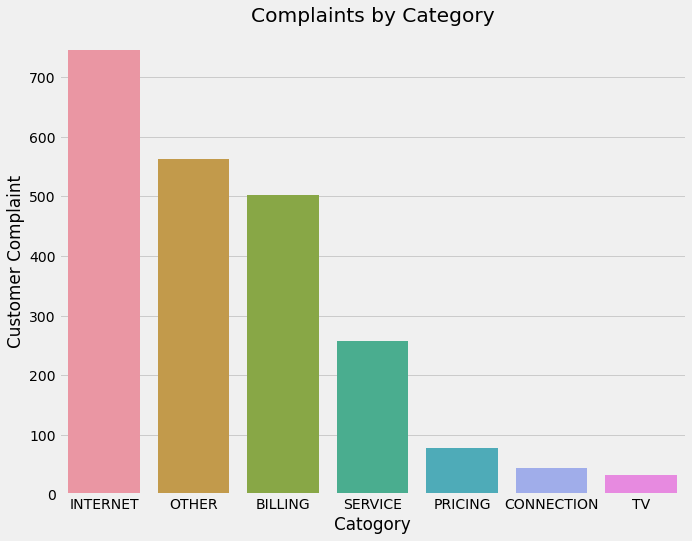

In [24]:
plt.figure(figsize=(10,8))
plt.title('Complaints by Category')
sns.barplot(data=grouped_by_comp, x='Catogory', y='Customer Complaint')

**As per compalaints most of them are relater to Internat, Billing and Service.**

### Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [25]:
# this Function returns Open or Closed by its status
def populate_comp_status(status):
    if(status == 'Solved' ) :
        return "Closed"
    elif(status == 'Pending'):
        return "Open"
    else :
        return status

In [26]:
# Categorizing Complaint status
comcast_df['comp_status'] = comcast_df['Status'].apply(populate_comp_status)

In [27]:
# Group data by complaint status
grouped_by_status = comcast_df.groupby(by='comp_status')['comp_status'].count()
grouped_by_status

comp_status
Closed    1707
Open       517
Name: comp_status, dtype: int64

### Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

In [28]:
status_by_states = pd.crosstab(index=comcast_df['State'], columns=comcast_df['comp_status'])
status_by_states

comp_status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


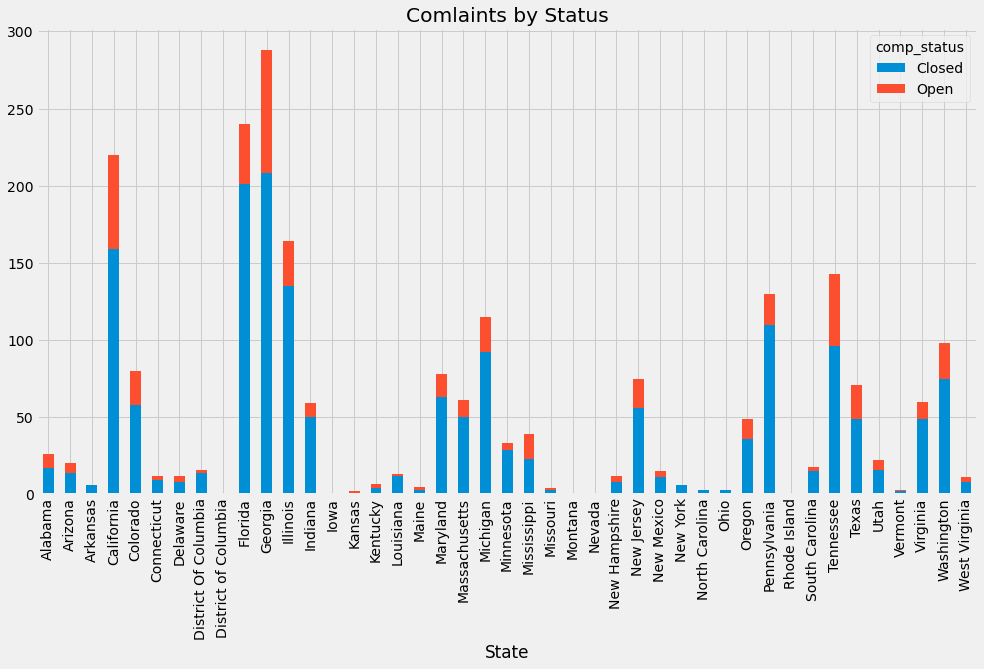

In [29]:
_= status_by_states.plot.bar(figsize=(15,8),stacked=True,title='Comlaints by Status')

### Provide insights on: Which state has the maximum complaints

In [30]:
percentage = (288/len(comcast_df)) * 100
percentage

12.949640287769784

Georgia is having maximum number of complaint. out of that 208 is closed and 80 is still open and its around 13% of total number of complaints.

### Which state has the highest percentage of unresolved complaints

In [31]:
df = status_by_states.merge(comcast_df.groupby(by='State')['comp_status'].count(),
                            left_on='State' , right_on='State' )
df.rename(columns={'comp_status':'Total'}, inplace=True)
df.reset_index(inplace=True)
df.sort_values('Total', ascending=False, inplace=True)
df

,State,Closed,Open,Total
10,Georgia,208,80,288
9,Florida,201,39,240
3,California,159,61,220
11,Illinois,135,29,164
36,Tennessee,96,47,143
33,Pennsylvania,110,20,130
20,Michigan,92,23,115
41,Washington,75,23,98
4,Colorado,58,22,80
18,Maryland,63,15,78


In [32]:
# Identifing state with highest unsolved percentage
df['unsolved %'] = (df['Open'] / df['Total']) * 100
df.sort_values('unsolved %', ascending=False, inplace=True, ignore_index=True)
df

,State,Closed,Open,Total,unsolved %
0,Kansas,1,1,2,50.000000
1,Kentucky,4,3,7,42.857143
2,Mississippi,23,16,39,41.025641
3,Maine,3,2,5,40.000000
4,Alabama,17,9,26,34.615385
5,New Hampshire,8,4,12,33.333333
6,Vermont,2,1,3,33.333333
7,Delaware,8,4,12,33.333333
8,Tennessee,96,47,143,32.867133
9,Texas,49,22,71,30.985915


In [33]:
state = df.iloc[df['unsolved %'].argmax()]
print(f'{state["State"]} is having max unsolved percentage with{state["Open"]} case open out of {state["Total"]} total cases. The percentage is {state["unsolved %"]}%')

Kansas is having max unsolved percentage with1 case open out of 2 total cases. The percentage is 50.0%


<AxesSubplot:title={'center':'Unsolved Complaints by States'}, xlabel='State'>

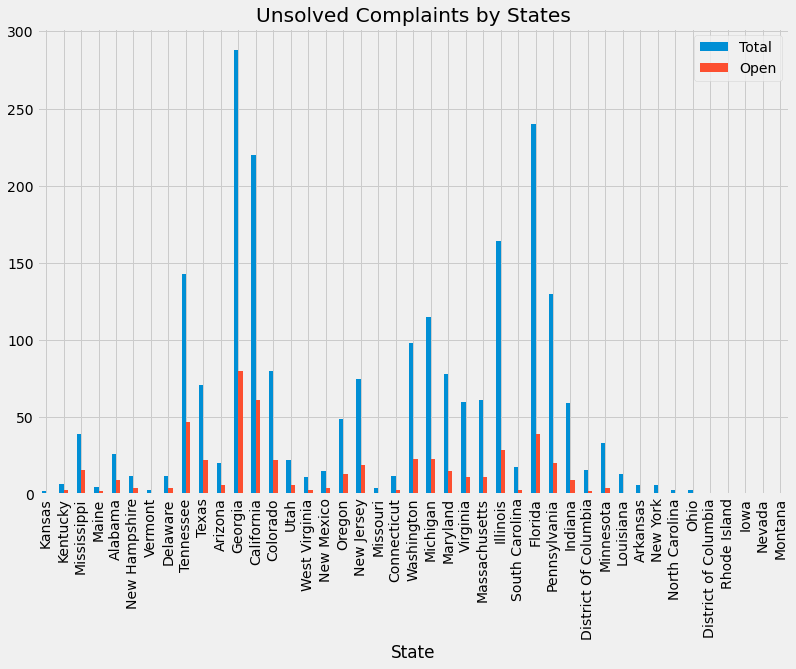

In [34]:
df.plot.bar(figsize=(12,8), x='State', y=['Total','Open'], title="Unsolved Complaints by States")

**However the number of complaint of Kansas is very low. If we take top 10 states by total number of complaints results as follows.**

In [35]:
# Identifying most unsolved complaints percentage by top 10 states with complaints
top10 = df.sort_values(['Total'], ascending=False, ignore_index=True)[:10]
top10 = top10.sort_values(['unsolved %'], ascending=False, ignore_index=True)
top10

,State,Closed,Open,Total,unsolved %
0,Tennessee,96,47,143,32.867133
1,Georgia,208,80,288,27.777778
2,California,159,61,220,27.727273
3,Colorado,58,22,80,27.500000
4,Washington,75,23,98,23.469388
5,Michigan,92,23,115,20.000000
6,Maryland,63,15,78,19.230769
7,Illinois,135,29,164,17.682927
8,Florida,201,39,240,16.250000
9,Pennsylvania,110,20,130,15.384615


In [36]:
state_ = top10.iloc[0]
print(f'{state_["State"]} is having max unsolved percentage with {state_["Open"]} case open out of {state_["Total"]} total cases. The percentage is {state_["unsolved %"]}%')

Tennessee is having max unsolved percentage with 47 case open out of 143 total cases. The percentage is 32.86713286713287%


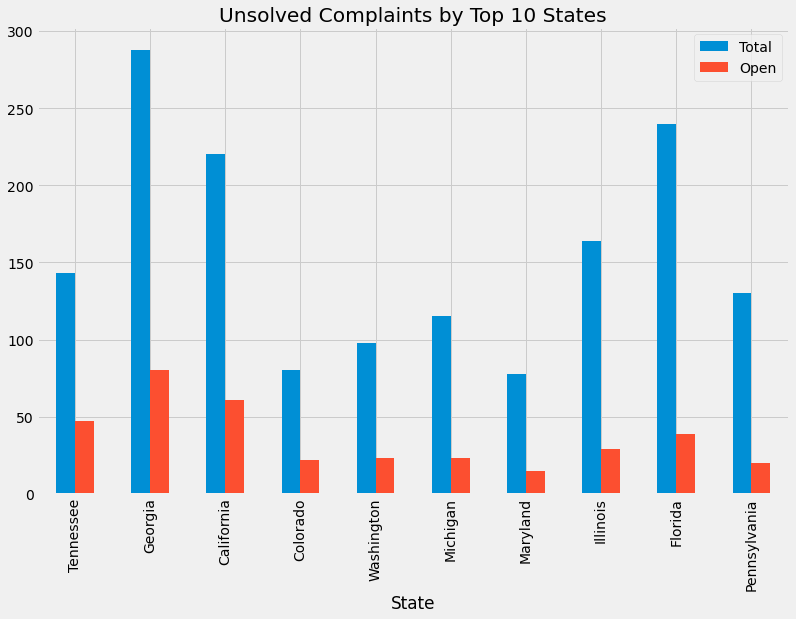

In [37]:
_ =top10.plot.bar(figsize=(12,8), x='State', y=['Total','Open'], title="Unsolved Complaints by Top 10 States")

### Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [38]:
status_by_state = pd.crosstab(index=comcast_df['State'], 
                              columns=[comcast_df['comp_status'],comcast_df['Received Via']])
status_by_state.reset_index(inplace=True)
status_by_state

comp_status                  State             Closed           \
Received Via                       Customer Care Call Internet   
0                          Alabama                  7       10   
1                          Arizona                  5        9   
2                         Arkansas                  3        3   
3                       California                 83       76   
4                         Colorado                 34       24   
5                      Connecticut                  3        6   
6                         Delaware                  1        7   
7             District Of Columbia                  9        5   
8             District of Columbia                  0        1   
9                          Florida                105       96   
10                         Georgia                 96      112   
11                        Illinois                 57       78   
12                         Indiana                 28       22   
13                            Iowa                  0        1   
14                          Kansas                  0        1   
15                        Kentucky                  3        1   
16                       Louisiana                  8        4   
17                           Maine                  2        1   
18                        Maryland                 36       27   
19                   Massachusetts                 32       18   
20                        Michigan                 36       56   
21                       Minnesota                 18       11   
22                     Mississippi                 10       13   
23                        Missouri                  2        1   
24                         Montana                  0        1   
25                          Nevada                  1        0   
26                   New Hampshire                  3        5   
27                      New Jersey                 30       26   
28                      New Mexico                  7        4   
29                        New York                  2        4   
30                  North Carolina                  0        3   
31                            Ohio                  1        2   
32                          Oregon                 15       21   
33                    Pennsylvania                 61       49   
34                    Rhode Island                  0        1   
35                  South Carolina                 10        5   
36                       Tennessee                 53       43   
37                           Texas                 25       24   
38                            Utah                  8        8   
39                         Vermont                  2        0   
40                        Virginia                 27       22   
41                      Washington                 35       40   
42                   West Virginia                  6        2   

comp_status                Open           
Received Via Customer Care Call Internet  
0                             3        6  
1                             3        3  
2                             0        0  
3                            36       25  
4                            11       11  
5                             0        3  
6                             0        4  
7                             2        0  
8                             0        0  
9                            19       20  
10                           32       48  
11                           19       10  
12                            5        4  
13                            0        0  
14                            0        1  
15                            1        2  
16                            0        1  
17                            1        1  
18                            7        8  
19                            6        5  
20                           13       10  
21                            3        1

In [39]:
status_by_state.columns

MultiIndex([( 'State',                   ''),
            ('Closed', 'Customer Care Call'),
            ('Closed',           'Internet'),
            (  'Open', 'Customer Care Call'),
            (  'Open',           'Internet')],
           names=['comp_status', 'Received Via'])

In [40]:
status_by_state[('Total', 'Customer Care Call')] =  (status_by_state[('Closed', 'Customer Care Call')] +
                                                     (status_by_state[('Open', 'Customer Care Call')]))
status_by_state[('Total', 'Internet')] =  (status_by_state[('Closed', 'Internet')] + 
                                           (status_by_state[('Open', 'Internet')]))
status_by_state

comp_status                  State             Closed           \
Received Via                       Customer Care Call Internet   
0                          Alabama                  7       10   
1                          Arizona                  5        9   
2                         Arkansas                  3        3   
3                       California                 83       76   
4                         Colorado                 34       24   
5                      Connecticut                  3        6   
6                         Delaware                  1        7   
7             District Of Columbia                  9        5   
8             District of Columbia                  0        1   
9                          Florida                105       96   
10                         Georgia                 96      112   
11                        Illinois                 57       78   
12                         Indiana                 28       22   
13                            Iowa                  0        1   
14                          Kansas                  0        1   
15                        Kentucky                  3        1   
16                       Louisiana                  8        4   
17                           Maine                  2        1   
18                        Maryland                 36       27   
19                   Massachusetts                 32       18   
20                        Michigan                 36       56   
21                       Minnesota                 18       11   
22                     Mississippi                 10       13   
23                        Missouri                  2        1   
24                         Montana                  0        1   
25                          Nevada                  1        0   
26                   New Hampshire                  3        5   
27                      New Jersey                 30       26   
28                      New Mexico                  7        4   
29                        New York                  2        4   
30                  North Carolina                  0        3   
31                            Ohio                  1        2   
32                          Oregon                 15       21   
33                    Pennsylvania                 61       49   
34                    Rhode Island                  0        1   
35                  South Carolina                 10        5   
36                       Tennessee                 53       43   
37                           Texas                 25       24   
38                            Utah                  8        8   
39                         Vermont                  2        0   
40                        Virginia                 27       22   
41                      Washington                 35       40   
42                   West Virginia                  6        2   

comp_status                Open                       Total           
Received Via Customer Care Call Internet Customer Care Call Internet  
0                             3        6                 10       16  
1                             3        3                  8       12  
2                             0        0                  3        3  
3                            36       25                119      101  
4                            11       11                 45       35  
5                             0        3                  3        9  
6                             0        4                  1       11  
7                             2        0                 11        5  
8                             0        0                  0        1  
9                            19       20                124      116  
10                           32       48                128      160  
11                           19       10                 76       88  
12                            5    

In [41]:
status_by_state[('Resolved', 'Customer Care Call %')] = (status_by_state[('Closed', 'Customer Care Call')] /
              (status_by_state[('Total', 'Customer Care Call')]))*100
status_by_state[('Resolved', 'Internet %')] =  (status_by_state[('Closed', 'Internet')] / 
              (status_by_state[('Total', 'Internet')]))*100
status_by_state.fillna(0, inplace=True)
status_by_state

comp_status                  State             Closed           \
Received Via                       Customer Care Call Internet   
0                          Alabama                  7       10   
1                          Arizona                  5        9   
2                         Arkansas                  3        3   
3                       California                 83       76   
4                         Colorado                 34       24   
5                      Connecticut                  3        6   
6                         Delaware                  1        7   
7             District Of Columbia                  9        5   
8             District of Columbia                  0        1   
9                          Florida                105       96   
10                         Georgia                 96      112   
11                        Illinois                 57       78   
12                         Indiana                 28       22   
13                            Iowa                  0        1   
14                          Kansas                  0        1   
15                        Kentucky                  3        1   
16                       Louisiana                  8        4   
17                           Maine                  2        1   
18                        Maryland                 36       27   
19                   Massachusetts                 32       18   
20                        Michigan                 36       56   
21                       Minnesota                 18       11   
22                     Mississippi                 10       13   
23                        Missouri                  2        1   
24                         Montana                  0        1   
25                          Nevada                  1        0   
26                   New Hampshire                  3        5   
27                      New Jersey                 30       26   
28                      New Mexico                  7        4   
29                        New York                  2        4   
30                  North Carolina                  0        3   
31                            Ohio                  1        2   
32                          Oregon                 15       21   
33                    Pennsylvania                 61       49   
34                    Rhode Island                  0        1   
35                  South Carolina                 10        5   
36                       Tennessee                 53       43   
37                           Texas                 25       24   
38                            Utah                  8        8   
39                         Vermont                  2        0   
40                        Virginia                 27       22   
41                      Washington                 35       40   
42                   West Virginia                  6        2   

comp_status                Open                       Total           \
Received Via Customer Care Call Internet Customer Care Call Internet   
0                             3        6                 10       16   
1                             3        3                  8       12   
2                             0        0                  3        3   
3                            36       25                119      101   
4                            11       11                 45       35   
5                             0        3                  3        9   
6                             0        4                  1       11   
7                             2        0                 11        5   
8                             0        0                  0        1   
9                            19       20                124      116   
10                           32       48                128      160   
11                           19       10                 76       88   
12                   